# My Mathematical Adventures with Covid-19

The world is in Crisis with the virus known as Covid-19 and Nigeria is at risk, I decided to make it my business to keep track of the cases in Nigeria. The purpose of this notebook is purely educational, I have become very fascinated by the math behind ***epidemiology***, I see it as a means of learning Maths and data science.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Daily update of covid-19 in Nigeria.

In [2]:
#f = open("covid-19.csv","a")
#f.write("39,18,232\n")
#format: Days,Number of cases/day, Total Number of cases \n

#f.close()

In [3]:
dataframe = pd.read_csv("covid-19.csv")

In [4]:
time   = dataframe.Days
Tcases = dataframe.Total_No_of_Cases
Ncases = dataframe.No_of_Cases

Pandemics like covid-19 grow at an exponential rate. The *Graph I* below shows the Total Number of cases with respect to time of the outbreak.

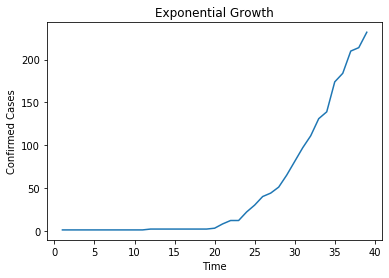

In [10]:
plt.title("Exponential Growth")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.plot(time, Tcases)

If you take the derivatives at each point you get the rate of change as shown on *Graph II*.

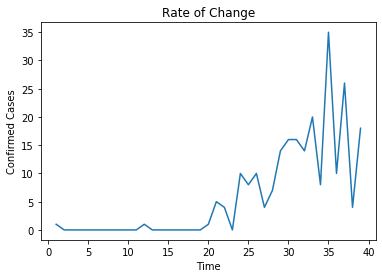

In [11]:
plt.title("Rate of Change")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.plot(time, Ncases)

The third graph is a Logarithmic of the covid-19 data.

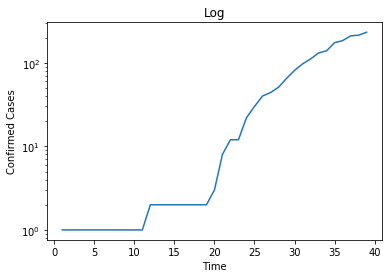

In [12]:
plt.title("Log")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.yscale("log")
plt.plot(time, Tcases)

## Predictions

Using the data I will be predicting the amount of new cases in Nigeria. 

The equation used to predict logistic growth is.

$ Nd = (1 + E*P)^{d}*No $

where: <br> &emsp; Nd = the number of cases to be predicted. <br> &emsp; E  = the Average number of people someone infected is exposed to each day.<br> &emsp; P  = Probability of becoming a new infection <br> &emsp; d  = day to be predicted. <br> &emsp; No = Current Number of cases.

Another important equation for the predition is the ***growth factor*** given as:

$$ Growth factor = \frac{Number\space of\space cases\space of\space Today}{Number\space of\space Cases\space of\space Yesterday} $$

or

$$Growth factor = 1 + E*P $$
I am going to used two methods of prediction

1) Using the Curent Growth Factor


In [8]:
def predict(x):
    Growthfactor = Tcases[len(Tcases)-1]/Tcases[len(Tcases)-2]
    pred = ((Growthfactor ** x) * Tcases[len(Tcases)-1])
    print("The Growth factor is", Growthfactor ,"\nThe predicted Value is" ,int(round(pred,0)))

predict(1)

The Growth factor is 1.0841121495327102 
The predicted Value is 252


2) Using the average Growth Factor.

In [9]:
def avrPredict(d):
    try:
        n = list(Tcases)
        u = 0
        y = 0 
        for i in n:
            x = n[u+1]/n[u]
            u = u+1
            y += x
    except IndexError:
        average = ((y/u)**d)*Tcases[len(Tcases)-1]
        print("The average growth factor is", y/u, "\nThe average predicted value is", int(round(average, 0)))
        
avrPredict(1)

The average growth factor is 1.187199153727272 
The average predicted value is 275


## Reference

The explanation of the maths in the Notebook can found here [Exponential growth and epidemics](https://www.youtube.com/watch?v=Kas0tIxDvrg ), the YouTube video by 3Blue1Brown